<h1>K-Nearest Neighbor and Clustering</h1>

In this notebook you will learn about:
- **K-Nearest Neighbor** – a supervised learning algorithm that makes predictions for a new data point based on the closest labeled data points in the feature space, assuming that points near each other tend to have similar outcomes
- **Clustering** – an unsupervised learning approach that identifies natural groupings or clusters in the data, revealing patterns and relationships without needing predefined labels

## K-Nearest Neighbor
- **Principle**: algorithm classifies new data points based on the majority label of their **k** nearest neighbors in the feature space
- **Distance metric**: similarity between data points is measured using distance metrics such as Euclidean or Manhattan
- **Parameter k**: determines how many neighbors are considered for the decision — small **k** makes the model sensitive to noise, while large k may oversmooth class boundaries
- **Prediction**: to predict a new input, KNN identifies the **k** closest training samples and assigns the most common class among them
- **Learning process**: KNN does not perform explicit training, it simply stores the training data and makes predictions based on proximity, which is why it is called a lazy learner

## KNN Example: Iris Flower Classification

- we will apply a KNN classifier to classify Iris flowers into species based on their features.

Algorithm
- classifies new data points based on the majority label of their k nearest neighbors in the feature space
- assumes that points close to each other are likely to belong to the same class

Features:
- sepal length (cm)
- sepal width (cm)

Classes / Species:
- setosa
- versicolor
- virginica

Number of samples: 150
Features: ['sepal length (cm)', 'sepal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']
Accuracy: 0.76


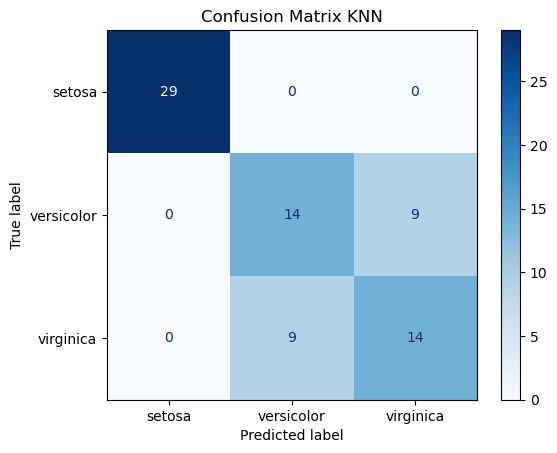

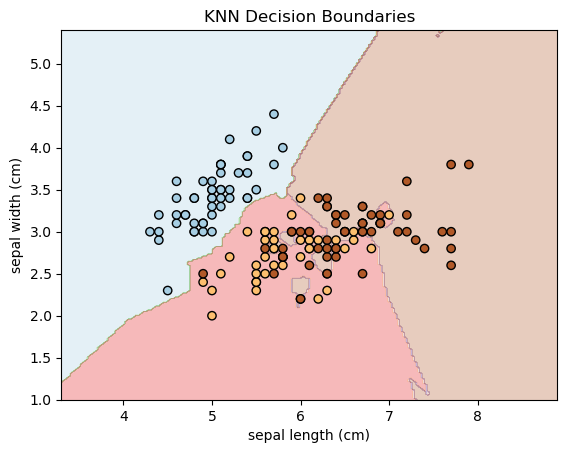

In [27]:
#Import
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#Load
data = load_iris()
X = data.data[:, :2]
y = data.target
target_names = data.target_names

#Print
print(f"Number of samples: {X.shape[0]}")
print(f"Features: {data.feature_names[:2]}")
print(f"Classes: {target_names}")

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

#Train
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

#Predict
y_pred = model.predict(X_test)

#Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix KNN")
plt.show()

#Decision Boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("KNN Decision Boundaries")
plt.show()


## Clustering
- **Principle**: clustering is an unsupervised learning technique where the model has access only to input data and no predefined output labels
- **Goal**: to divide data into groups (clusters) so that objects within the same cluster are as similar as possible, while objects in different clusters are as different as possible
- **Cluster definition**: each cluster represents a collection of data points sharing common characteristics or proximity in the feature space
- **Data segmentation**: clustering helps reveal hidden patterns or structures within data, providing insight into its natural organization  
- **K-Means**: partitions data into *k* clusters based on distance from cluster centroids, which are iteratively updated until convergence  
- **DBSCAN**: groups points based on density, forming clusters of closely packed points while marking isolated points as outliers  